### Locally Weighted Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
N_SAMPLES = 200
N_FEATURES = 1

In [3]:
x = np.random.randn(N_SAMPLES,1)
x = np.append(np.ones((N_SAMPLES,1)),x,axis = 1)
noise = np.random.randn(N_SAMPLES,1)
y = x**3 + noise
y = y[:,1]

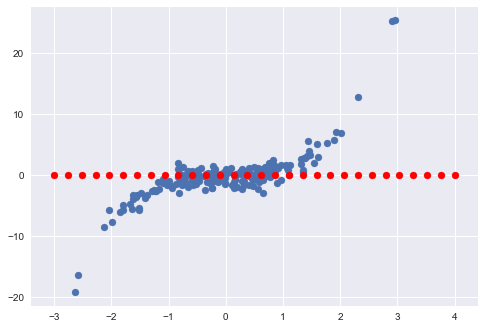

In [5]:
plt.style.use('seaborn')
N_POINTS = 30
X = np.linspace(-3,4,N_POINTS)
plt.scatter(x[:,1],y)
plt.scatter(X,np.zeros((N_POINTS,1)),c = 'red')
plt.show()

In [6]:
PI = 3.14
SIGMA = 0.5

In [7]:
def predict(x,theta):
    return np.dot(x,theta)

def normalDist(x,mu,sigma):
    x = x.reshape((-1,1))
    numerator = np.exp(-1*(((x-mu)**2)/(2*(sigma**2))))
    denom = (sigma*np.sqrt(2*PI))
    ans = numerator/denom
    return ans

def gradient(x,y,theta,X):
    grad = []
    for i in range(x.shape[1]):
        g = np.mean((((predict(x,theta) - y) * x[:,i].reshape(-1,1)) * normalDist(x[:,1],X,SIGMA)) , axis = 0)
        grad.append(g)
    grad = np.array(grad)
    grad = grad.reshape(-1,1)
    return grad

def optimize(x,y,X,LEARNING_RATE,EPOCHS):
    y = y.reshape((-1,1))
    loss = []
    theta = np.zeros((N_FEATURES + 1,1))
    for itr in range(EPOCHS):
        grad = gradient(x,y,theta,X)
        dTheta = LEARNING_RATE * grad
        theta -= dTheta
        loss.append(np.mean(((y - predict(x,theta))**2)/2,axis = 0))
        
    return theta,loss

In [8]:
theta,loss = optimize(x,y,-2,0.01,1000)

In [26]:
X = np.linspace(-3,4,N_POINTS)

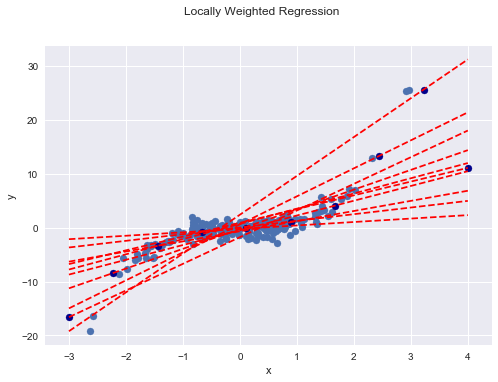

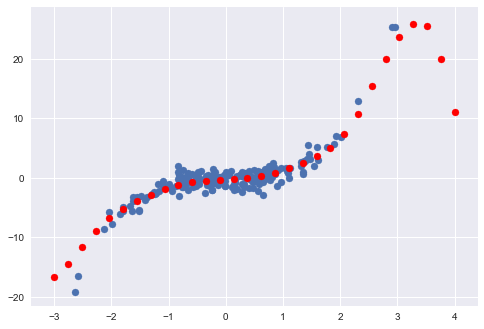

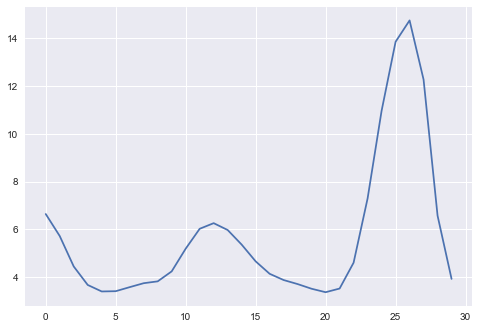

In [37]:
def plot(x,y):
    plt.style.use('seaborn')
    plt.figure()
    plt.suptitle('Locally Weighted Regression')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x[:,1],y)
    Y = []
    loss = []
    for i in range(X.shape[0]):
        theta,l = optimize(x,y,X[i],0.1,500)
        loss.append(l[-1])
        y_pred = predict([1,X[i]],theta)
        Y.append(y_pred)
    
    _X = np.linspace(-3,4,N_POINTS/3)
    for i in range(_X.shape[0]): 
        theta,l = optimize(x,y,_X[i],0.1,500)
        plt.plot(_X,(theta[0] + theta[1]*_X),c = 'red',ls='--')
        plt.scatter(_X[i],(theta[0] + theta[1]*_X[i]),c = 'darkblue')
    plt.show()
    plt.scatter(x[:,1],y)
    plt.scatter(X,Y,c = 'red')
    plt.show()
    plt.plot(loss)
    plt.show()

plot(x,y)

In [ ]:
### Locally Weighted Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N_SAMPLES = 200
N_FEATURES = 1

x = np.random.randn(N_SAMPLES,1)
x = np.append(np.ones((N_SAMPLES,1)),x,axis = 1)
noise = np.random.randn(N_SAMPLES,1)
y = x**3 + noise
y = y[:,1]

plt.style.use('seaborn')
N_POINTS = 30
X = np.linspace(-3,4,N_POINTS)
plt.scatter(x[:,1],y)
plt.scatter(X,np.zeros((N_POINTS,1)),c = 'red')
plt.show()

PI = 3.14
SIGMA = 0.5



def predict(x,theta):
    return np.dot(x,theta)

def normalDist(x,mu,sigma):
    x = x.reshape((-1,1))
    numerator = np.exp(-1*(((x-mu)**2)/(2*(sigma**2))))
    denom = (sigma*np.sqrt(2*PI))
    ans = numerator/denom
    return ans

def gradient(x,y,theta,X):
    grad = []
    for i in range(x.shape[1]):
        g = np.mean((((predict(x,theta) - y) * x[:,i].reshape(-1,1)) * normalDist(x[:,1],X,SIGMA)) , axis = 0)
        grad.append(g)
    grad = np.array(grad)
    grad = grad.reshape(-1,1)
    return grad

def optimize(x,y,X,LEARNING_RATE,EPOCHS):
    y = y.reshape((-1,1))
    loss = []
    theta = np.zeros((N_FEATURES + 1,1))
    for itr in range(EPOCHS):
        grad = gradient(x,y,theta,X)
        dTheta = LEARNING_RATE * grad
        theta -= dTheta
        loss.append(np.mean(((y - predict(x,theta))**2)/2,axis = 0))
        
    return theta,loss

theta,loss = optimize(x,y,-2,0.01,1000)

X = np.linspace(-3,4,N_POINTS)

def plot(x,y):
    plt.style.use('seaborn')
    plt.figure()
    plt.suptitle('Locally Weighted Regression')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x[:,1],y)
    Y = []
    loss = []
    for i in range(X.shape[0]):
        theta,l = optimize(x,y,X[i],0.1,500)
        loss.append(l[-1])
        y_pred = predict([1,X[i]],theta)
        Y.append(y_pred)
    
    _X = np.linspace(-3,4,N_POINTS/3)
    for i in range(_X.shape[0]): 
        theta,l = optimize(x,y,_X[i],0.1,500)
        plt.plot(_X,(theta[0] + theta[1]*_X),c = 'red',ls='--')
        plt.scatter(_X[i],(theta[0] + theta[1]*_X[i]),c = 'darkblue')
    plt.show()
    plt.scatter(x[:,1],y)
    plt.scatter(X,Y,c = 'red')
    plt.show()
    plt.plot(loss)
    plt.show()

plot(x,y)

